In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
sc.settings.verbosity = 3             
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=96)

scanpy==1.5.1 anndata==0.7.3 umap==0.4.6 numpy==1.19.3 scipy==1.5.1 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.1


In [2]:
adata = sc.read_h5ad('./b1_merged.h5ad')
adata

AnnData object with n_obs × n_vars = 41494 × 19522
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'genotype', 'sample_type', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'SCT_snn_res.0.8', 'population', 'celltype'
    var: 'sct.detection_rate', 'sct.gmean', 'sct.variance', 'sct.residual_mean', 'sct.residual_variance', 'sct.variable'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

... storing 'orig.ident' as categorical
... storing 'genotype' as categorical
... storing 'sample_type' as categorical
... storing 'SCT_snn_res.0.5' as categorical
... storing 'seurat_clusters' as categorical
... storing 'SCT_snn_res.0.8' as categorical
... storing 'population' as categorical
... storing 'celltype' as categorical


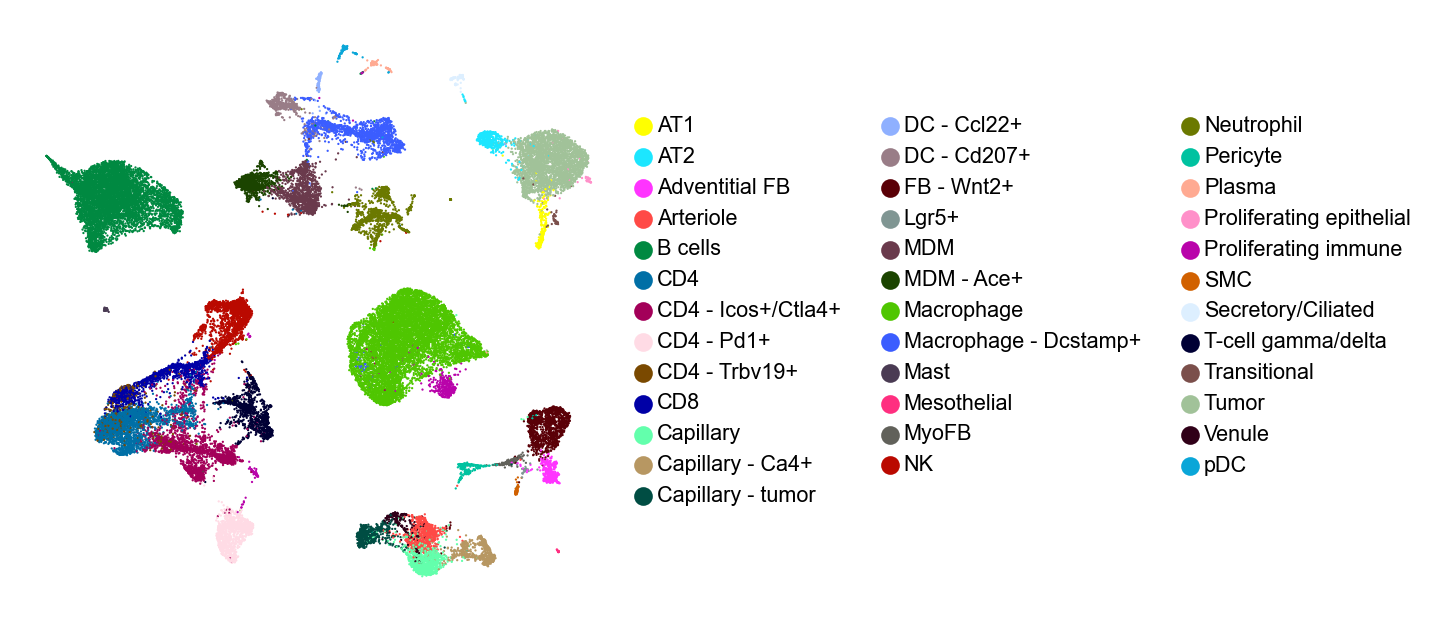

In [3]:
sc.pl.umap(adata, color='celltype', frameon=False, legend_fontsize='xx-small', title='')

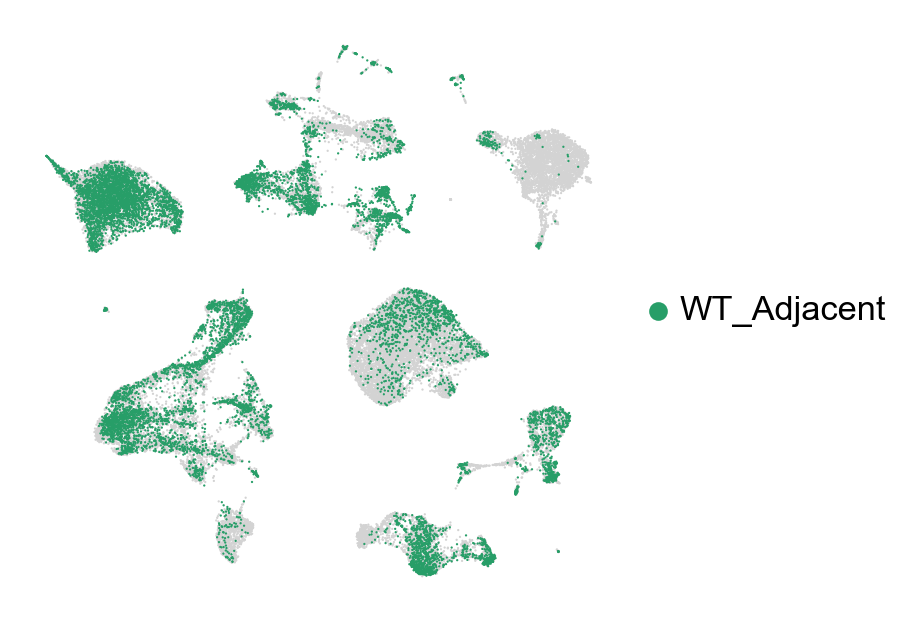

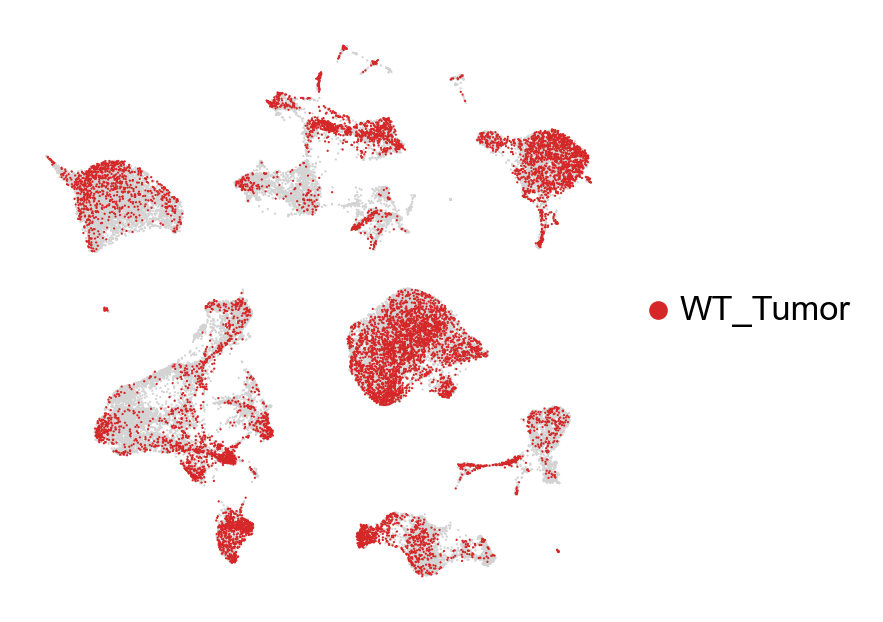

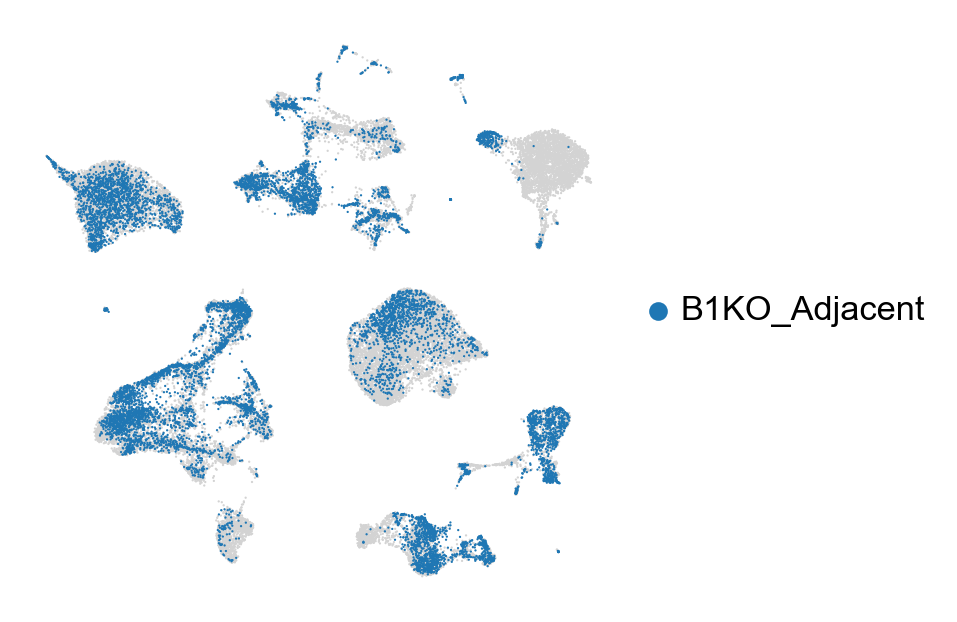

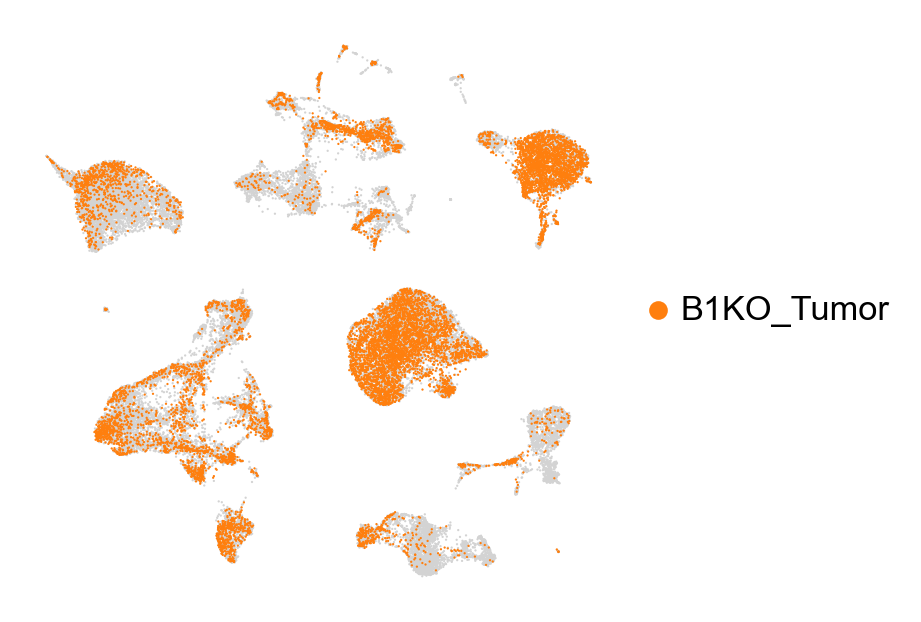

In [4]:
for batch in ['WT_Adjacent', 'WT_Tumor', 'B1KO_Adjacent', 'B1KO_Tumor']:
    sc.pl.umap(adata, color='orig.ident', groups=[batch], title='', frameon=False)

In [5]:
marker_genes = ['Cd8a', 'Cd4', 'Trbv19', 'Icos', 'Cd3g', 'Pdcd1', 'Nkg7', 'Epcam', 'Scgb1a1', 'Foxj1', 'Cd68', 'Mki67', 'Irf7', 'Cd19', 'Jchain', 'Ccl22', 'Cd207', 'Cd86', 'Dcstamp', 'Cd14', 'Ace', 'Cpa3', 'S100a9', 'Sftpa1', 'Sftpc', 'Hopx', 'Cldn4', 'Pecam1', 'Car4', 'Ackr1', 'Hey1', 'Aplnr', 'Cspg4', 'Acta2', 'Wt1', 'Pi16', 'Wnt2', 'Lgr5', 'Col1a1']

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_celltype']`


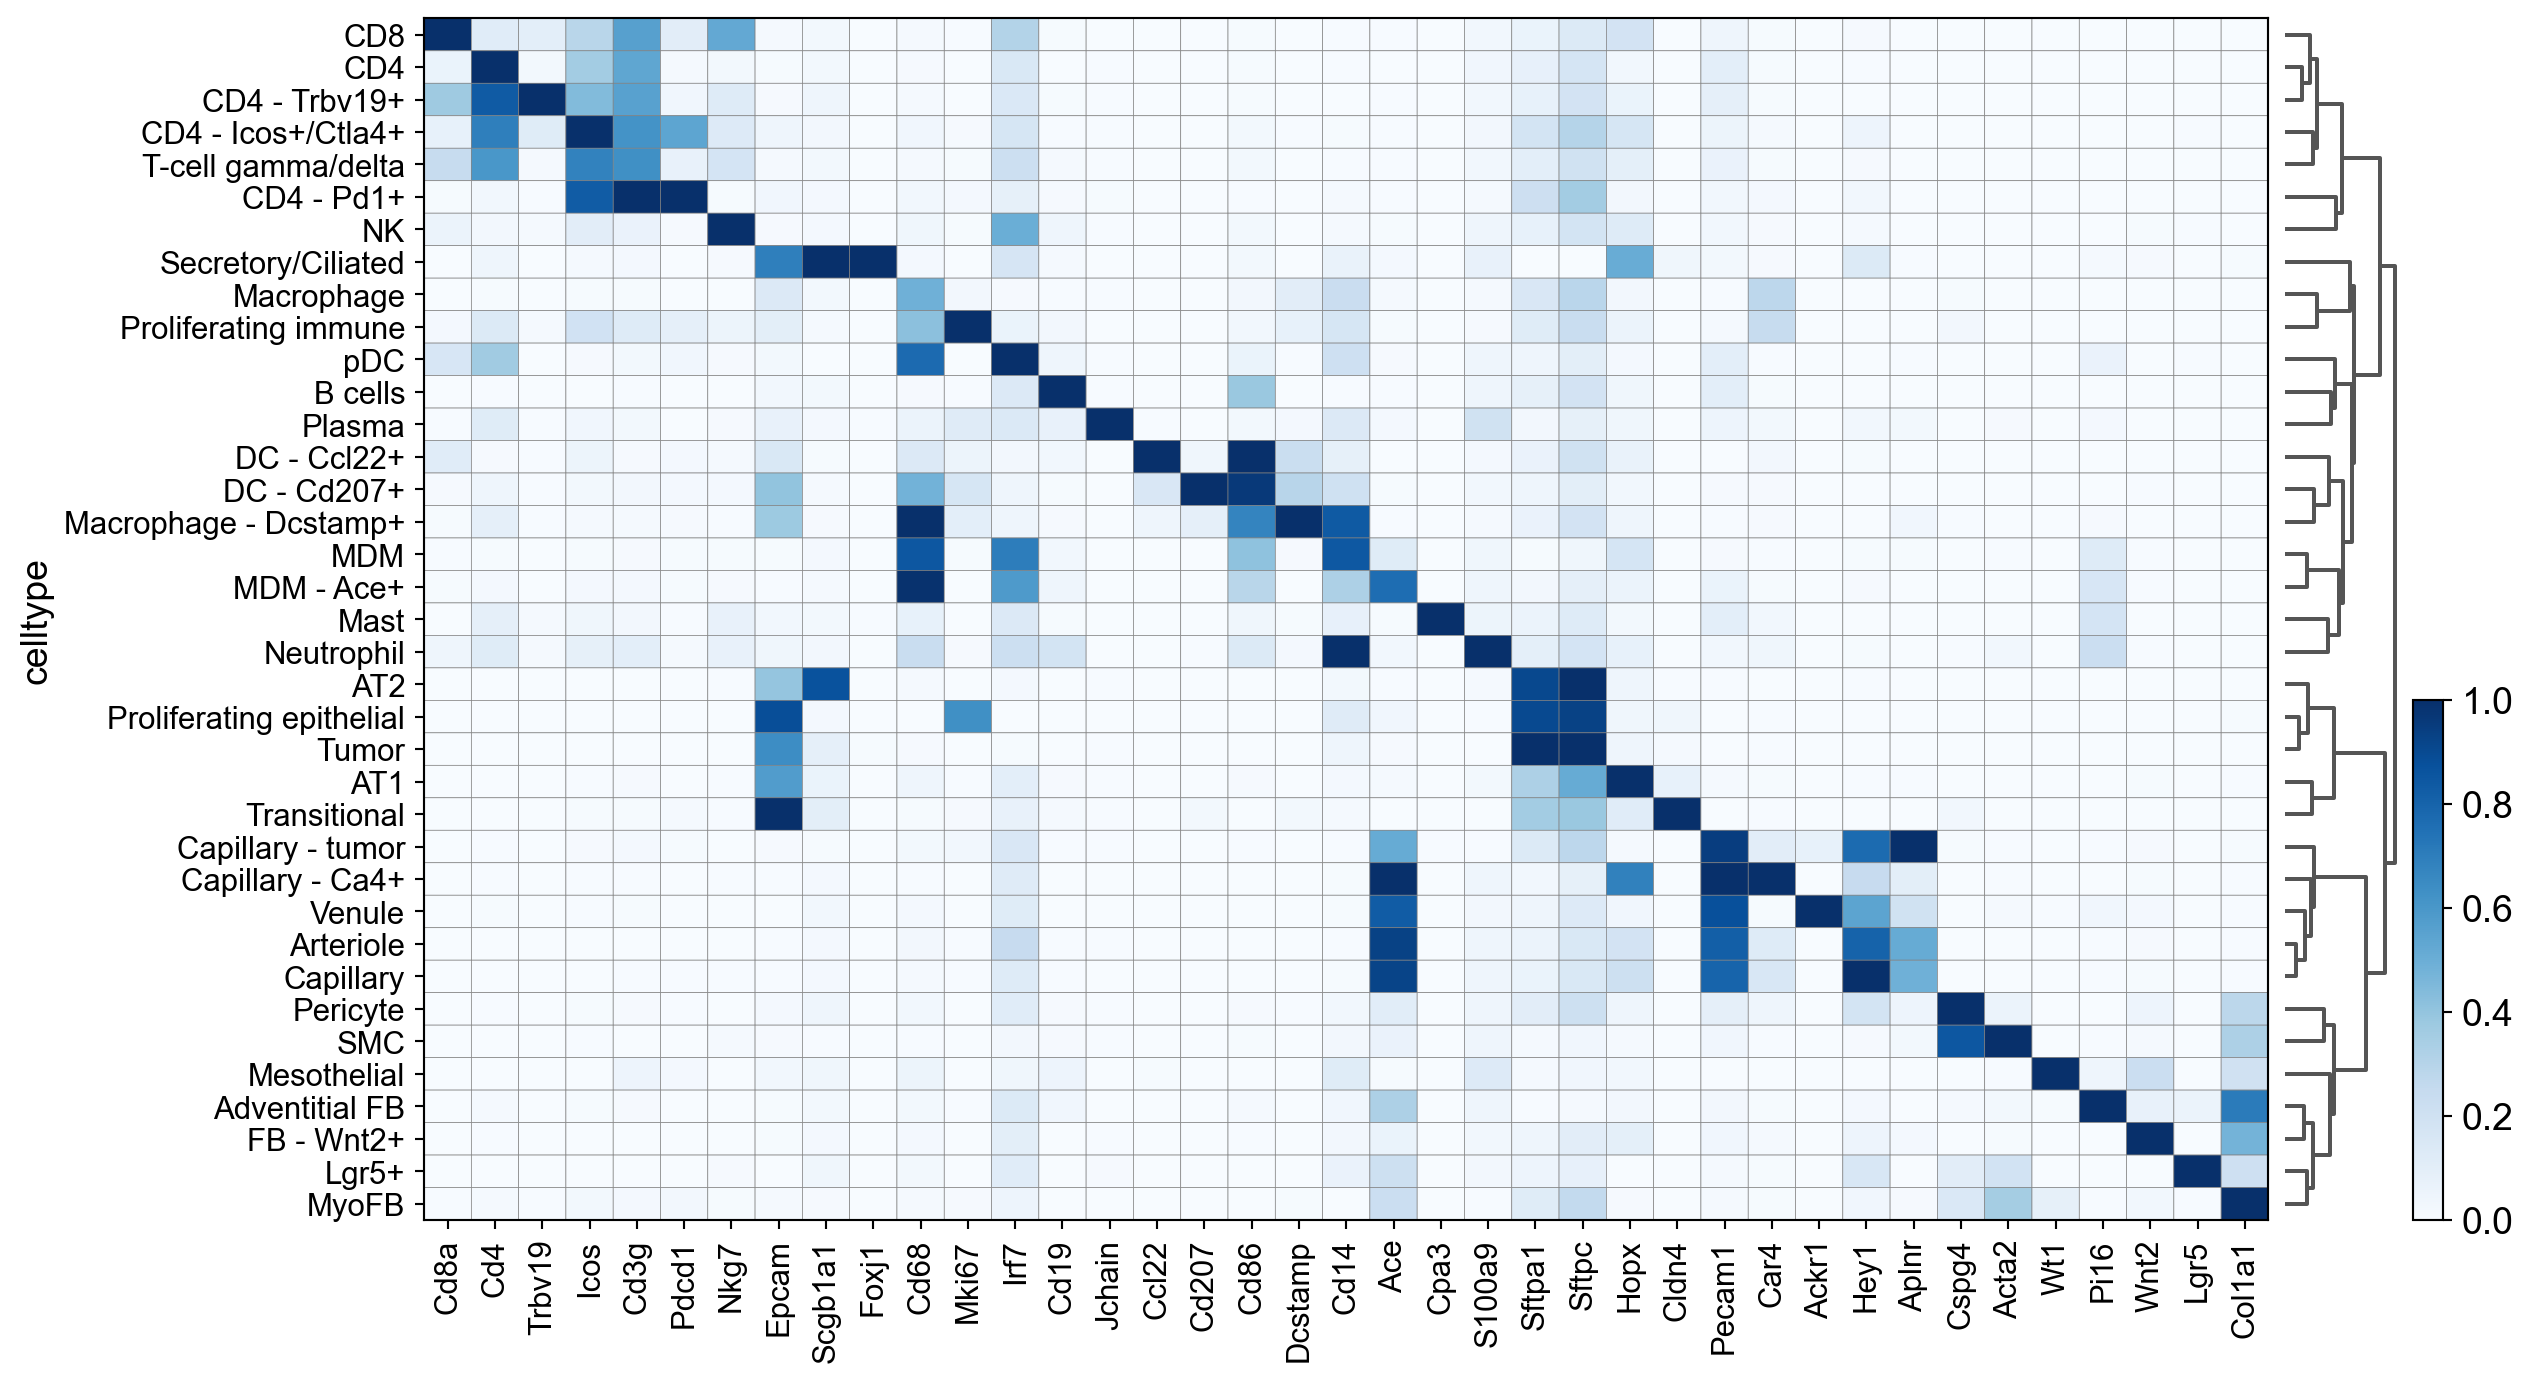

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[12.48, 0.8, 0.2])

In [6]:
sc.pl.matrixplot(adata, marker_genes, groupby='celltype',  dendrogram=True, standard_scale='var', cmap='Blues')

In [7]:
tumor = adata[adata.obs['celltype'].isin(['Tumor'])]
at2 = adata[adata.obs['celltype'].isin(['AT2'])]
at1 = adata[adata.obs['celltype'].isin(['AT1'])]
airway = adata[adata.obs['celltype'].isin(['Secretory/Ciliated'])]
transitional = adata[adata.obs['celltype'].isin(['Transitional'])]


Trying to set attribute `.uns` of view, copying.


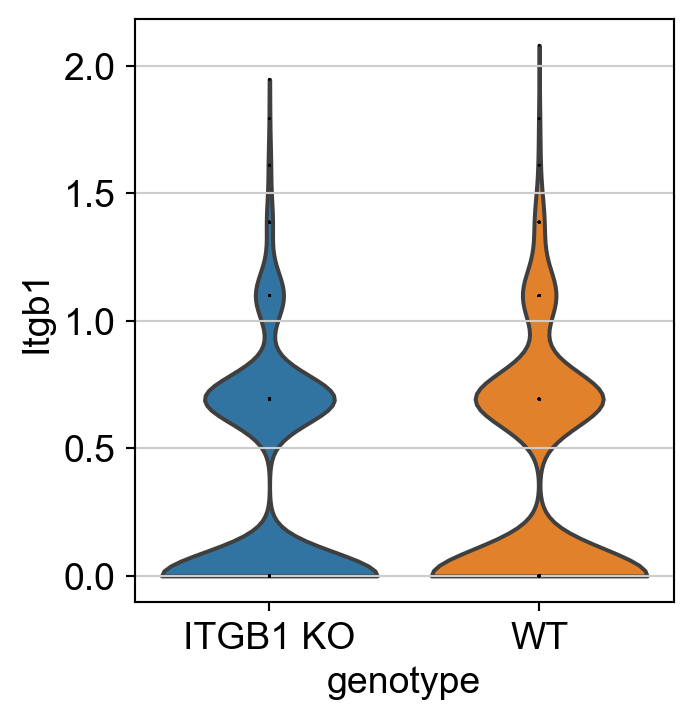

Trying to set attribute `.uns` of view, copying.


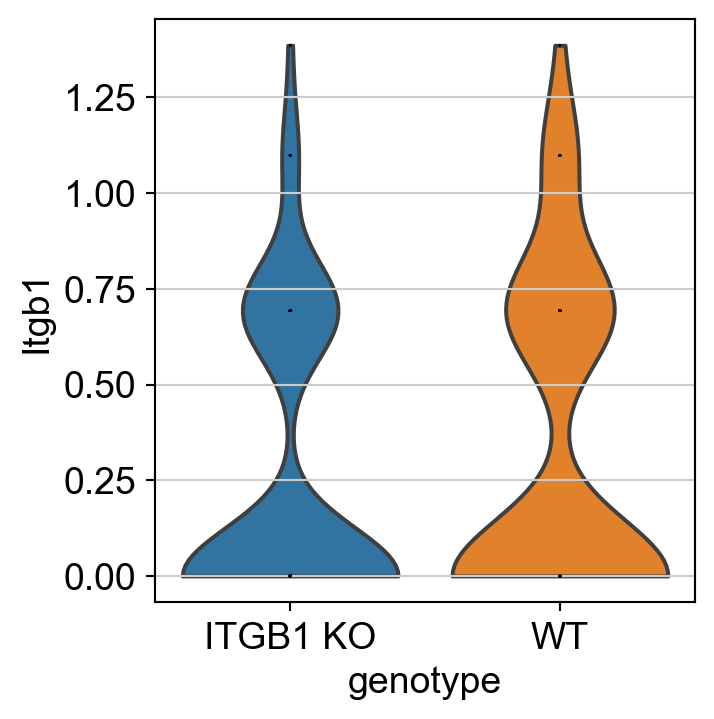

Trying to set attribute `.uns` of view, copying.


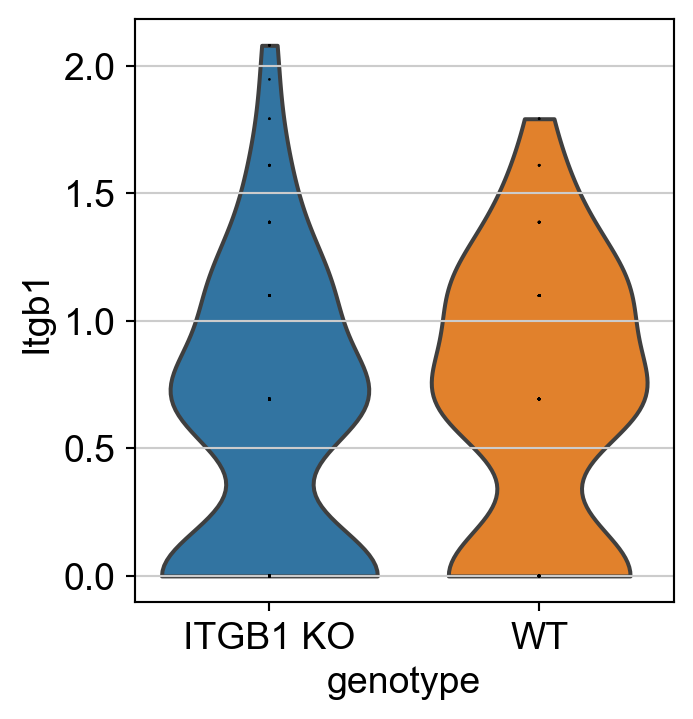

Trying to set attribute `.uns` of view, copying.


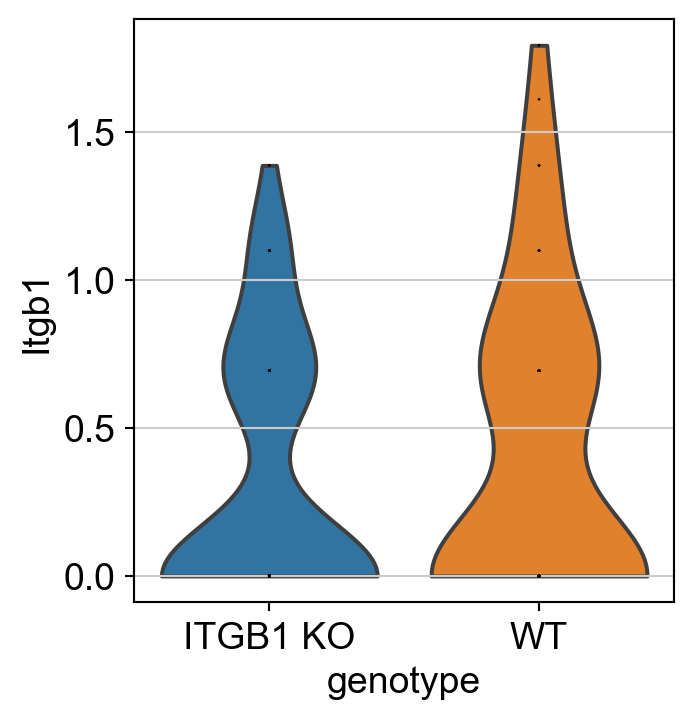

Trying to set attribute `.uns` of view, copying.


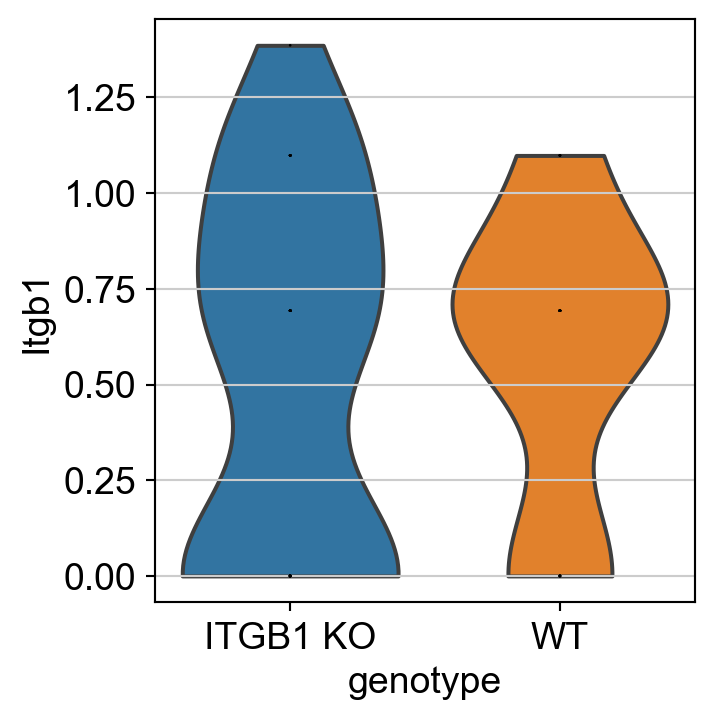

In [8]:
sc.pl.violin(tumor, "Itgb1", groupby='genotype', jitter=False)
sc.pl.violin(at2, "Itgb1", groupby='genotype',jitter=False)
sc.pl.violin(at1, "Itgb1", groupby='genotype',jitter=False)
sc.pl.violin(airway, "Itgb1", groupby='genotype',jitter=False)
sc.pl.violin(transitional, "Itgb1", groupby='genotype',jitter=False)


In [9]:
epi = adata[adata.obs['celltype'].isin(['Tumor', 'AT1', 'AT2', "Transitional", 'Proliferating epithelial', "Secretory/Ciliated"])]

computing PCA
    with n_comps=50
    finished (0:00:09)
computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


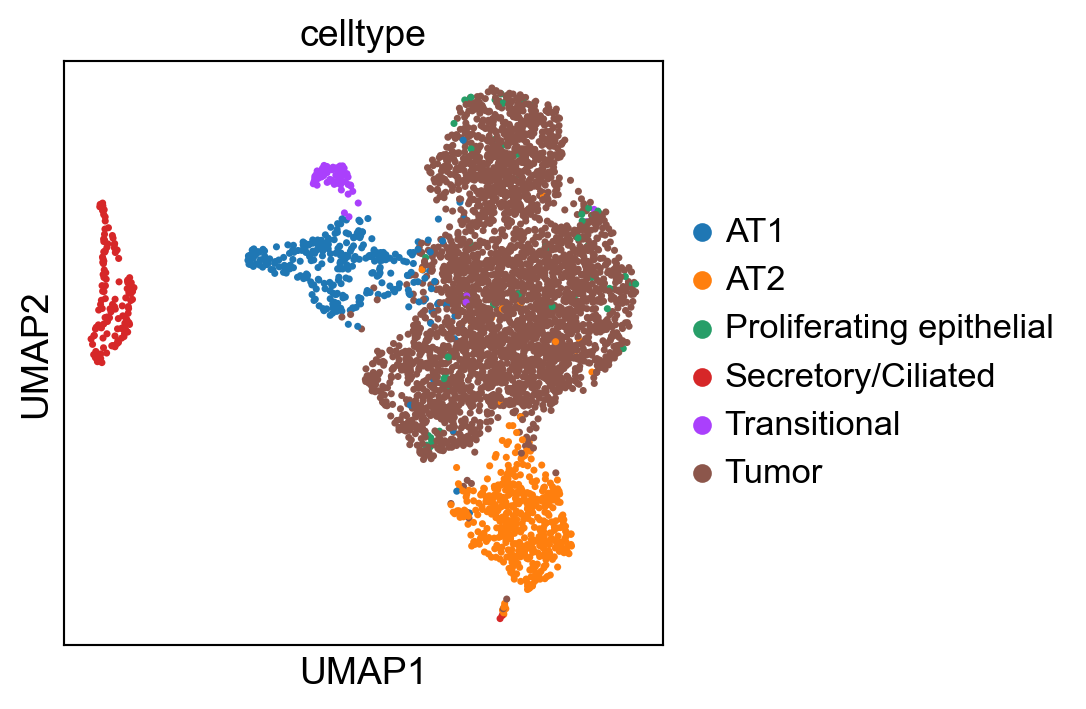

In [10]:
sc.tl.pca(epi, svd_solver='arpack')
sc.pp.neighbors(epi, n_neighbors=10, n_pcs=15)
sc.tl.umap(epi)
sc.pl.umap(epi, color='celltype')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


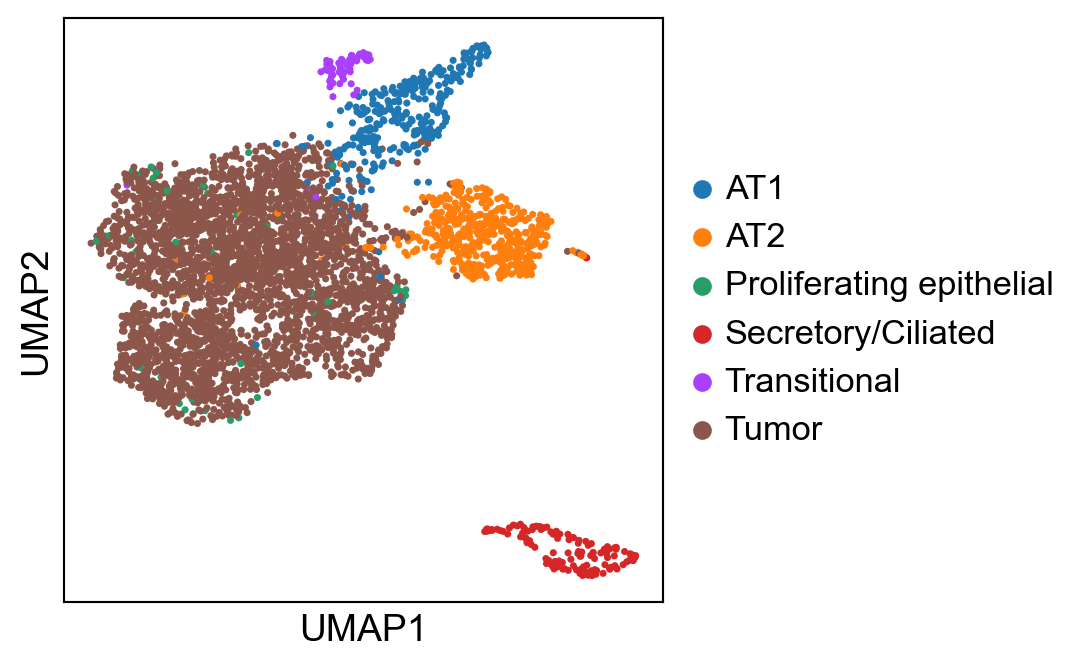

In [11]:
sc.tl.paga(epi, groups='celltype')
sc.pl.paga(epi, plot=False)  
sc.tl.umap(epi, init_pos='paga')
sc.pl.umap(epi, color='celltype', title='')
